# Project 3 Submission
Please fill out:
* Student name: Gabby Amparo
* Student pace: full-time
* Scheduled project review date/time: TDB
* Instructor name: Rafael Carrasco
* Blog post URL:

## Terry Traffic Stops

In Terry v. Ohio (Links to an external site.), a landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. Terry Stops are stops made of suspicious drivers.

Build a classifier to predict whether an arrest was made after a Terry Stop, given information about the presence of weapons, the time of day of the call, etc. Note that this is a binary classification problem.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding
#### Data column names and descriptions
* Subject Age Group: 10 year increments as reported by the officer
* Subject ID: Key, generated daily, identifying unique subjects
* GO / SC Num: "General Offense" or Street Check Number, relating the Terry Stop to the Parent Report
* Terry Stop ID: Key Identifying Terry Stop Reports Stop Resolution: Resolution of the Stop as reported by the officer
* Stop Resolution: Resolution of the stop as reported by the officer
* Weapon Type: Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.
* Officer ID: Unique key identifying officers in the dataset
* Officer YOB: Year of brith as reported by the officer
* Officer Gender: Gender of the Officer
* Officer Race: Race of the Officer
* Subject Percieved Race: Race of the subject as reported officer
* Subject Percieved Gender: Percieved gender as reported by the officer
* Reported Date: Date the Report was filed
* Reported Time: Time the stop was reported
* Initial Call Type: Initial classicifaction of the call as assigned by 911
* Final Call Type: Final classicifaction of the call as assigned by 911
* Call Type: How the call was recieved by the communication center
* Officer Squad: Functional sqaud assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP)
* Arrest Flag: Indicator of whether or not a physical arrest was Made, of the subject, during the Terry Stop. Does not necessarily relfect a report of an arrest in Records Management System (RMS)
* Frisk Flag: Indicator of whether a frisk was conducted
* Sector: Sector of the address associated with the Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred
* Precinct: Precinct of the address assictaed with the CAD event. Not necessarily where the Terry Stop occurred
* Beat: Beat of the address associated with the underlying CAD event. Not nen=cessarily where the Terry Stop occurred*

This data was obtained from www.data.gov City of Seattle website. The data contains information recaring
This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). Each row represents a unique stop.Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes. Where available, data elements from the associated Computer Aided Dispatch (CAD) event (e.g. Call Type, Initial Call Type, Final Call Type) are included. For this dataset, I am looking to predict arrests using features in the dataset. 

***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

***
# Data Scrubbing of Terry_Stops.csv Data


## Import dataframe from csv file using pd.read_csv function

In [2]:
# importing cvs file and saving it under a variable
terry_df = pd.read_csv('data/Terry_Stops.csv')

In [3]:
# review data
terry_df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


In [4]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44869 entries, 0 to 44868
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44869 non-null  object
 1   Subject ID                44869 non-null  int64 
 2   GO / SC Num               44869 non-null  int64 
 3   Terry Stop ID             44869 non-null  int64 
 4   Stop Resolution           44869 non-null  object
 5   Weapon Type               44869 non-null  object
 6   Officer ID                44869 non-null  object
 7   Officer YOB               44869 non-null  int64 
 8   Officer Gender            44869 non-null  object
 9   Officer Race              44869 non-null  object
 10  Subject Perceived Race    44869 non-null  object
 11  Subject Perceived Gender  44869 non-null  object
 12  Reported Date             44869 non-null  object
 13  Reported Time             44869 non-null  object
 14  Initial Call Type     

In [5]:
terry_df.shape

(44869, 23)

In [6]:
terry_df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

***
##  Creating subset dataframe with columns to be used

In [7]:
terry_df = terry_df[['Subject Age Group', 'Subject ID', 'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Reported Date', 'Initial Call Type', 'Call Type', 'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat' ]]

In [8]:
# renaming columns
terry_df.columns = ['subject_age', 'subject_id', 'stop_resolution',
         'weapon_type', 'officer_id', 'officer_yob', 
         'officer_gender', 'officer_race', 'subject_race', 
         'subject_gender', 'date', 'initial_call_type', 'call_type',
         'officer_squad', 'arrest', 'frisk',
         'precinct', 'sector', 'beat' ]

In [9]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44869 entries, 0 to 44868
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_age        44869 non-null  object
 1   subject_id         44869 non-null  int64 
 2   stop_resolution    44869 non-null  object
 3   weapon_type        44869 non-null  object
 4   officer_id         44869 non-null  object
 5   officer_yob        44869 non-null  int64 
 6   officer_gender     44869 non-null  object
 7   officer_race       44869 non-null  object
 8   subject_race       44869 non-null  object
 9   subject_gender     44869 non-null  object
 10  date               44869 non-null  object
 11  initial_call_type  44869 non-null  object
 12  call_type          44869 non-null  object
 13  officer_squad      44288 non-null  object
 14  arrest             44869 non-null  object
 15  frisk              44869 non-null  object
 16  precinct           44869 non-null  objec

***
## Converting column datatypes

In [10]:
# changing columns into categories and datetime
terry_df = terry_df.astype({'subject_age': 'category', 'officer_gender':'category', 
                'officer_race': 'category', 'subject_race':'category', 
                'subject_gender':'category', 'date':'datetime64','arrest':'category', 
                'frisk':'category','precinct':'category', 'sector':'category',
                'beat': 'category'})

In [11]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44869 entries, 0 to 44868
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subject_age        44869 non-null  category      
 1   subject_id         44869 non-null  int64         
 2   stop_resolution    44869 non-null  object        
 3   weapon_type        44869 non-null  object        
 4   officer_id         44869 non-null  object        
 5   officer_yob        44869 non-null  int64         
 6   officer_gender     44869 non-null  category      
 7   officer_race       44869 non-null  category      
 8   subject_race       44869 non-null  category      
 9   subject_gender     44869 non-null  category      
 10  date               44869 non-null  datetime64[ns]
 11  initial_call_type  44869 non-null  object        
 12  call_type          44869 non-null  object        
 13  officer_squad      44288 non-null  object        
 14  arrest

***
## Exploring column value counts and dealing with nan values

In [12]:
# the dataset seems to have '-' as place holders
# replacing '-' into Nan
terry_df.replace('-', np.nan, inplace=True)

In [13]:
terry_df.isna().sum()

subject_age           1420
subject_id               0
stop_resolution          0
weapon_type           9700
officer_id              24
officer_yob              0
officer_gender           0
officer_race             0
subject_race          1764
subject_gender         266
date                     0
initial_call_type    13039
call_type            13039
officer_squad          581
arrest                   0
frisk                  478
precinct              9733
sector                9931
beat                  9878
dtype: int64

In [14]:
terry_df.mode()

,subject_age,subject_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_race,subject_gender,date,initial_call_type,call_type,officer_squad,arrest,frisk,precinct,sector,beat
0,26 - 35,-1,Field Contact,None,7456,1986,M,White,White,Male,2015-10-01,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,E,N3


In [15]:
# found the modes of the df columns so I can replace nan values with mode values
terry_df['subject_race'] = terry_df['subject_race'].fillna('Other')

In [16]:
terry_df['subject_age'] = terry_df['subject_age'].fillna('26 - 35')

In [17]:
terry_df['subject_age'].value_counts()

26 - 35         16337
36 - 45          9464
18 - 25          9084
46 - 55          5771
56 and Above     2278
1 - 17           1935
Name: subject_age, dtype: int64

In [18]:
terry_df['subject_gender'] = terry_df['subject_gender'].replace('Unable to Determine',
                                                                'Gender Diverse (gender non-conforming and/or transgender)').replace('Unknown', 'Gender Diverse (gender non-conforming and/or transgender)')


In [19]:
terry_df['subject_gender'] = terry_df['subject_gender'].fillna('Male')

In [20]:
terry_df['subject_gender'].value_counts(dropna=False)

Male                                                 35349
Female                                                9170
Gender Diverse (gender non-conforming and/or t...      350
Name: subject_gender, dtype: int64

In [21]:
terry_df['subject_race'] = terry_df['subject_race'].fillna('Other')

In [22]:
terry_df['subject_race'].value_counts(dropna=False)

White                                        21930
Black or African American                    13372
Unknown                                       2382
Other                                         1916
Hispanic                                      1684
Asian                                         1431
American Indian or Alaska Native              1303
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander       42
Name: subject_race, dtype: int64

In [23]:
# replace N values in officer gender with mode
terry_df['officer_gender'] = terry_df['officer_gender'].replace('N', 'M')

In [24]:
terry_df['officer_gender'].value_counts(dropna=False)

M    39763
F     5106
Name: officer_gender, dtype: int64

In [25]:
terry_df.isna().sum()

subject_age              0
subject_id               0
stop_resolution          0
weapon_type           9700
officer_id              24
officer_yob              0
officer_gender           0
officer_race             0
subject_race             0
subject_gender           0
date                     0
initial_call_type    13039
call_type            13039
officer_squad          581
arrest                   0
frisk                  478
precinct              9733
sector                9931
beat                  9878
dtype: int64

In [26]:
# subtract officier YOB from report date column to get officers age
terry_df['officer_age'] = (terry_df.date.dt.year -  terry_df.officer_yob)

In [27]:
terry_df[terry_df.officer_age >70].head()

,subject_age,subject_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_race,subject_gender,date,initial_call_type,call_type,officer_squad,arrest,frisk,precinct,sector,beat,officer_age
1068,26 - 35,-1,Field Contact,NaN,NaN,1900,M,Unknown,Other,Male,2019-07-27,NaN,NaN,NaN,N,Y,West,K,K3,119
1069,26 - 35,-1,Field Contact,NaN,NaN,1900,M,Unknown,Other,Male,2019-07-27,NaN,NaN,NaN,N,Y,West,K,K3,119
1070,26 - 35,-1,Field Contact,NaN,NaN,1900,M,Unknown,Other,Male,2019-07-27,NaN,NaN,NaN,N,Y,West,K,K3,119
1091,26 - 35,-1,Field Contact,NaN,NaN,1900,M,Unknown,White,Male,2019-09-10,NaN,NaN,NaN,N,N,East,E,E3,119
1201,26 - 35,-1,Field Contact,NaN,8742,1900,M,Unknown,Other,Male,2020-10-17,DOWN - CHECK FOR PERSON DOWN,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,K,K3,120


In [28]:
# dropping rows that show officers over the 100 y.o.
# these rows ahve a lot of nan or unknown values
terry_df = terry_df.drop(terry_df[terry_df.officer_age >70].index)

In [29]:
terry_df.officer_age.describe()

count    44809.000000
mean        34.658685
std          8.462094
min         21.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         70.000000
Name: officer_age, dtype: float64

In [30]:
# 'not specified' and 'unknown' are the same thing
# so i will just put the values in one column
terry_df.replace({'officer_race' : {'Unknown': 'Not Specified'}})

,subject_age,subject_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_race,subject_gender,date,initial_call_type,call_type,officer_squad,arrest,frisk,precinct,sector,beat,officer_age
0,26 - 35,-1,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16,NaN,NaN,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,31
1,26 - 35,-1,Field Contact,None,5670,1965,M,White,Other,Male,2015-03-19,NaN,NaN,NaN,N,N,NaN,NaN,NaN,50
2,26 - 35,-1,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,54
3,26 - 35,-1,Field Contact,None,7539,1963,M,White,Other,Male,2015-04-01,NaN,NaN,NaN,N,N,NaN,NaN,NaN,52
4,26 - 35,-1,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03,NaN,NaN,NaN,N,N,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44864,56 and Above,16143289890,Field Contact,NaN,8709,1997,F,White,White,Male,2020-10-18,TRESPASS,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,M,M2,23
44865,56 and Above,16168302851,Field Contact,NaN,8724,1996,M,White,Other,Male,2020-10-19,"DISTURBANCE, MISCELLANEOUS/OTHER",911,WEST PCT 3RD W - MARY,N,N,West,M,M1,24
44866,56 and Above,16177694220,Field Contact,NaN,8709,1997,F,White,White,Male,2020-10-19,FIGHT - IP - PHYSICAL (NO WEAPONS),ONVIEW,TRAINING - FIELD TRAINING SQUAD,N,N,West,K,K2,23
44867,56 and Above,16193936552,Field Contact,NaN,8464,1989,M,White,White,Male,2020-10-19,DUI - DRIVING UNDER INFLUENCE,"TELEPHONE OTHER, NOT 911",EAST PCT 3RD W - CHARLIE,N,N,East,E,E2,31


In [31]:
terry_df.officer_race.value_counts(dropna=False)

White                            34132
Hispanic or Latino                2549
Two or More Races                 2489
Asian                             1854
Black or African American         1793
Not Specified                     1244
Nat Hawaiian/Oth Pac Islander      437
American Indian/Alaska Native      311
Unknown                              0
Name: officer_race, dtype: int64

In [32]:
# replace string values with binary values
fa = {'frisk' : {'Y' : 1, 'N' : 0}, 
      'arrest' : {'Y' : 1, 'N' : 0}}

terry_df.replace(fa, inplace=True)

In [33]:
terry_df.arrest.value_counts(dropna=False)

0    42169
1     2640
Name: arrest, dtype: int64

In [34]:
terry_df.frisk.value_counts(dropna=False)

0.0    34356
1.0     9975
NaN      478
Name: frisk, dtype: int64

In [35]:
terry_df = terry_df.dropna(subset=['frisk'])

In [36]:
terry_df.frisk.value_counts(dropna=False)

0.0    34356
1.0     9975
Name: frisk, dtype: int64

In [37]:
terry_df.shape

(44331, 20)

In [38]:
# most of the columsn still have nan values
# however, i will not use most of these columns
# so I will keep them there so that i am not deleting necessary information
# I will rearrage the columns in a format i prefer and then save this to a csv file

terry_df = terry_df[['date','subject_id','subject_age','subject_race','subject_gender',
              'stop_resolution','weapon_type','officer_id','officer_yob', 'officer_race', 'officer_gender',
            'officer_squad','initial_call_type','call_type','arrest', 'frisk','precinct', 'sector', 'beat','officer_age']]

In [39]:
# there are still a lot of Nan values in the data, however
# i do not want to remove/replace data thatmihgt be important
# also i do not plan on using a majority of the data that contains NaN values
terry_df.isna().sum()

date                     0
subject_id               0
subject_age              0
subject_race             0
subject_gender           0
stop_resolution          0
weapon_type           9644
officer_id               0
officer_yob              0
officer_race             0
officer_gender           0
officer_squad          535
initial_call_type    12813
call_type            12813
arrest                   0
frisk                    0
precinct              9590
sector                9784
beat                  9731
officer_age              0
dtype: int64

In [40]:
terry_df.corr()

,subject_id,officer_yob,arrest,frisk,officer_age
subject_id,1.000000,0.218674,0.440041,0.032966,-0.096329
officer_yob,0.218674,1.000000,0.115953,0.022935,-0.982973
arrest,0.440041,0.115953,1.000000,0.056144,-0.058811
frisk,0.032966,0.022935,0.056144,1.000000,-0.019276
officer_age,-0.096329,-0.982973,-0.058811,-0.019276,1.000000


<AxesSubplot:>

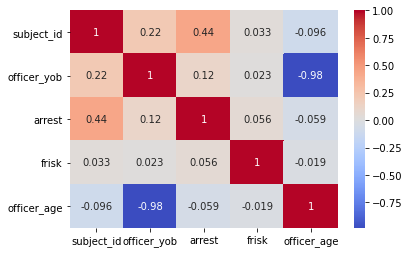

In [41]:
sns.heatmap(terry_df.corr(), annot=True, cmap = 'coolwarm')

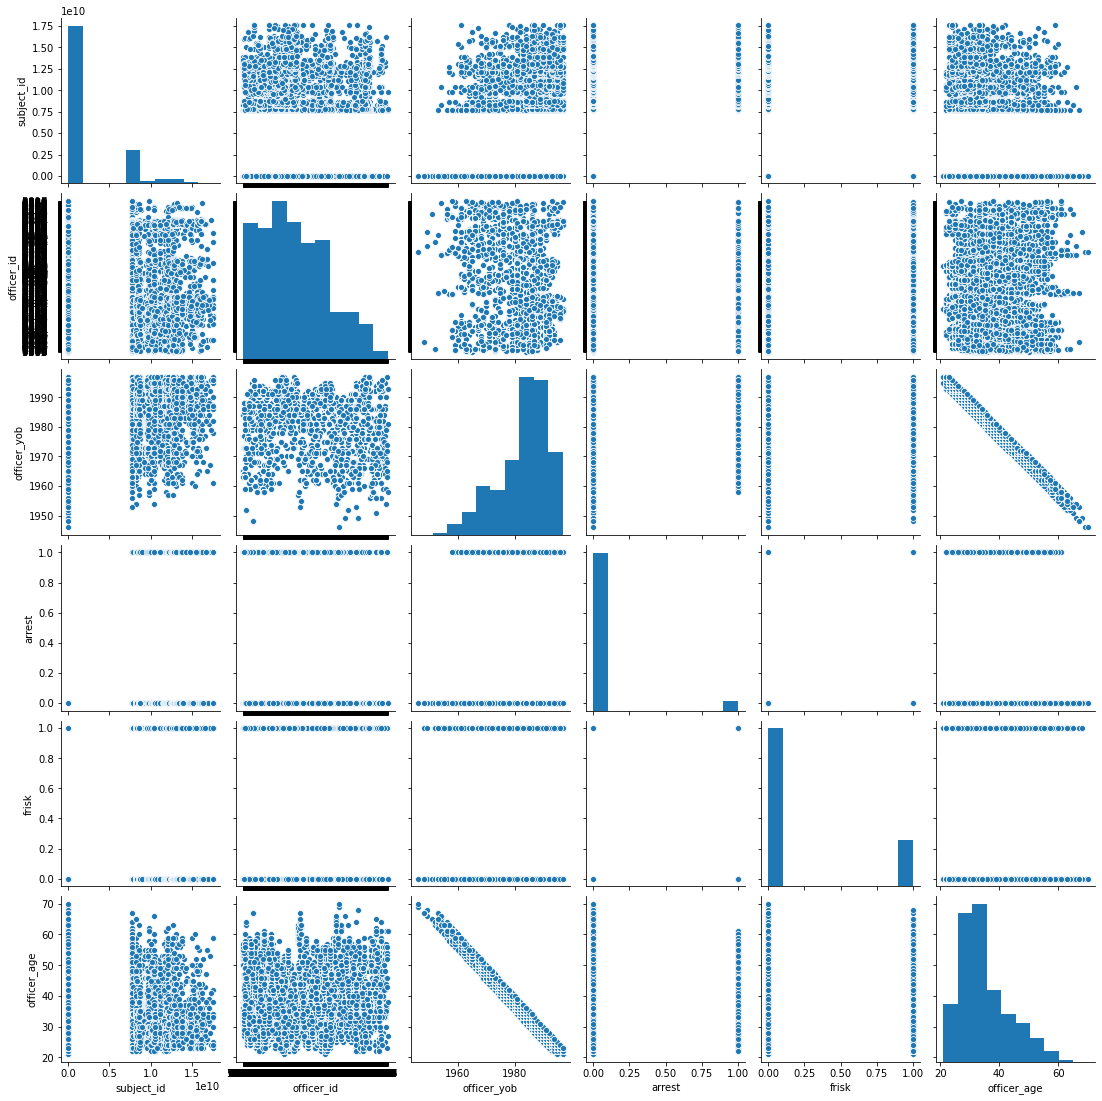

In [42]:
sns.pairplot(terry_df)

***
# EDA

In [43]:
terry_df = pd.read_csv('data/terry_clean.csv')

In [44]:
terry_df.head()

,date,subject_id,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_id,officer_yob,officer_race,officer_gender,officer_squad,initial_call_type,call_type,arrest,frisk,precinct,sector,beat,officer_age
0,2015-10-16,-1,26 - 35,Asian,Male,Arrest,None,7500,1984,Black or African American,M,SOUTH PCT 1ST W - ROBERT,NaN,NaN,0,0.0,South,O,O2,31
1,2015-03-19,-1,26 - 35,Other,Male,Field Contact,None,5670,1965,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,50
2,2015-04-01,-1,26 - 35,Other,Male,Field Contact,None,7539,1963,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,52
3,2015-04-03,-1,26 - 35,Black or African American,Male,Field Contact,None,6973,1977,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,38
4,2015-04-05,-1,26 - 35,Black or African American,Male,Field Contact,None,7402,1973,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,42


In [45]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               44331 non-null  object 
 1   subject_id         44331 non-null  int64  
 2   subject_age        44331 non-null  object 
 3   subject_race       44331 non-null  object 
 4   subject_gender     44331 non-null  object 
 5   stop_resolution    44331 non-null  object 
 6   weapon_type        34687 non-null  object 
 7   officer_id         44331 non-null  int64  
 8   officer_yob        44331 non-null  int64  
 9   officer_race       44331 non-null  object 
 10  officer_gender     44331 non-null  object 
 11  officer_squad      43796 non-null  object 
 12  initial_call_type  31518 non-null  object 
 13  call_type          31518 non-null  object 
 14  arrest             44331 non-null  int64  
 15  frisk              44331 non-null  float64
 16  precinct           347

In [46]:
# chaning datatypes of columns
terry_df = terry_df.astype({'date':'datetime64', 'subject_age': 'category',
                            'subject_race':'category', 'subject_gender':'category',
                            'stop_resolution': 'category','weapon_type':'category',
                             'officer_race': 'category', 'officer_gender':'category',
                            'arrest':'int32', 'frisk':'float',
                            'precinct':'category', 'sector':'category', 'beat': 'category'})

# creating a 'count' column so that counting categories is easier
terry_df['count'] = 1

In [47]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               44331 non-null  datetime64[ns]
 1   subject_id         44331 non-null  int64         
 2   subject_age        44331 non-null  category      
 3   subject_race       44331 non-null  category      
 4   subject_gender     44331 non-null  category      
 5   stop_resolution    44331 non-null  category      
 6   weapon_type        34687 non-null  category      
 7   officer_id         44331 non-null  int64         
 8   officer_yob        44331 non-null  int64         
 9   officer_race       44331 non-null  category      
 10  officer_gender     44331 non-null  category      
 11  officer_squad      43796 non-null  object        
 12  initial_call_type  31518 non-null  object        
 13  call_type          31518 non-null  object        
 14  arrest

***
## Questions

### Which Race is stopped the most?

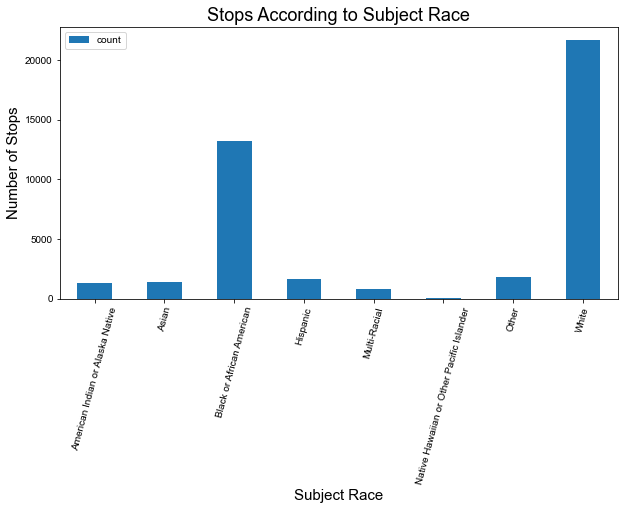

In [48]:
# creating a subset of data to answer questions
sub_race_df = terry_df[['subject_race', 'count']]
sub_race_df = sub_race_df.groupby('subject_race').count()

# eliminating unknown subject_race values
sub_race_df = sub_race_df[sub_race_df.index != 'Unknown']

sub_race_df

ax = sub_race_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Subject Race',
         fontsize=18)
plt.xlabel('Subject Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

***
### What demographic of officers perform the most stops?

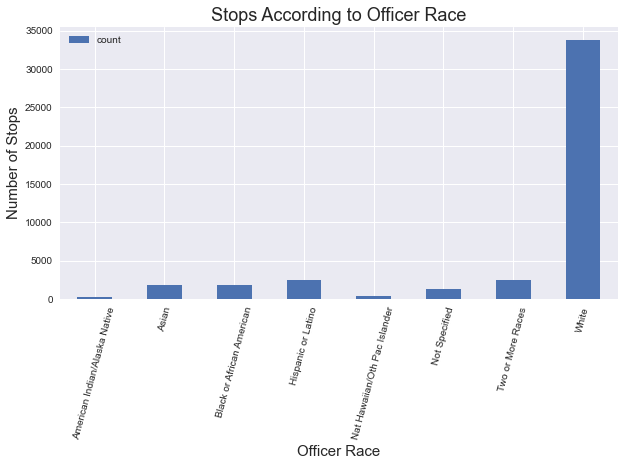

In [49]:
# creating a subset of data to answer questions
off_race_df = terry_df[['officer_race', 'count']]
off_race_df = off_race_df.groupby('officer_race').count()

ax = off_race_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Officer Race',
         fontsize=18)
plt.xlabel('Officer Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

<Figure size 1440x1224 with 0 Axes>

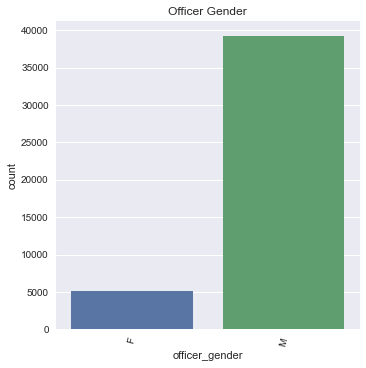

In [50]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'officer_gender', kind='count', data=terry_df)
plt.title("Officer Gender")
plt.xticks(rotation=75)
plt.show()

***
### Is there a difference in age groups across races?

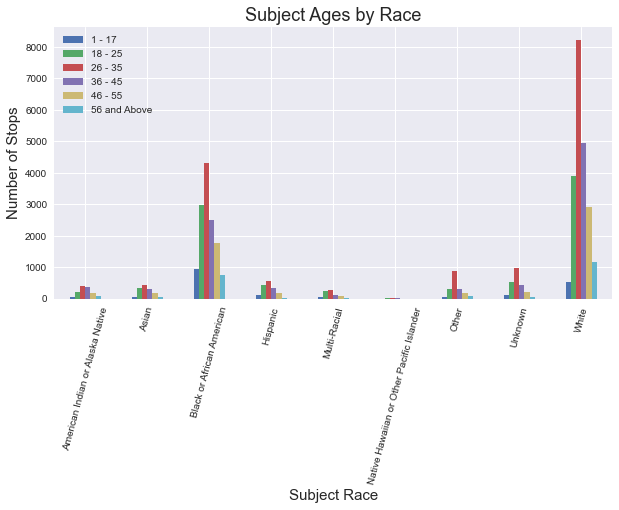

In [51]:
sub_race = terry_df[['subject_race','subject_age','count']]
sub_race = sub_race.groupby(['subject_race', 'subject_age']).count().unstack(level = 'subject_age')

sub_race.plot(kind = 'bar',  figsize=(10,5))
plt.style.use('seaborn')
plt.title('Subject Ages by Race',
         fontsize=18)
plt.xlabel('Subject Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.legend(labels = list(sub_race.columns.get_level_values(1)))
plt.show()

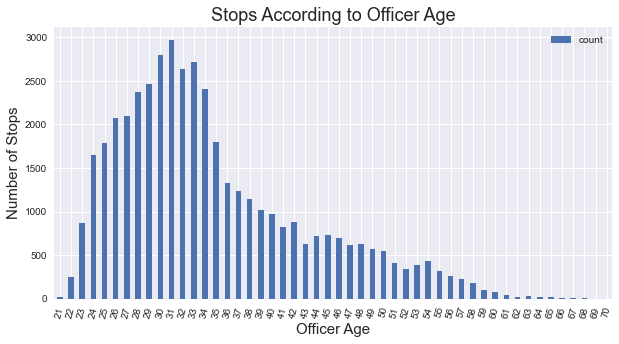

In [52]:
# creating a subset of data to answer questions
off_age_df = terry_df[['officer_age', 'count']]
off_age_df = off_age_df.groupby('officer_age').count()

ax = off_age_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Officer Age',
         fontsize=18)
plt.xlabel('Officer Age', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

<AxesSubplot:xlabel='officer_age'>

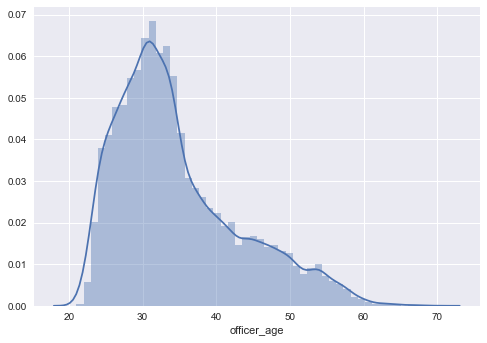

In [53]:
# this can probably be better shown as a displot
sns.distplot(terry_df['officer_age'])

### What age groups and races carried weapons?

In [54]:
weapons = [] 
for weapon in terry_df['weapon_type']:
    if weapon == 'None': 
        weapons.append(0)
    else:
        weapons.append(1) 
terry_df['has_weapon'] = weapons 
terry_df.head() 

,date,subject_id,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_id,officer_yob,officer_race,...,initial_call_type,call_type,arrest,frisk,precinct,sector,beat,officer_age,count,has_weapon
0,2015-10-16,-1,26 - 35,Asian,Male,Arrest,None,7500,1984,Black or African American,...,NaN,NaN,0,0.0,South,O,O2,31,1,0
1,2015-03-19,-1,26 - 35,Other,Male,Field Contact,None,5670,1965,White,...,NaN,NaN,0,0.0,NaN,NaN,NaN,50,1,0
2,2015-04-01,-1,26 - 35,Other,Male,Field Contact,None,7539,1963,White,...,NaN,NaN,0,0.0,NaN,NaN,NaN,52,1,0
3,2015-04-03,-1,26 - 35,Black or African American,Male,Field Contact,None,6973,1977,White,...,NaN,NaN,0,0.0,NaN,NaN,NaN,38,1,0
4,2015-04-05,-1,26 - 35,Black or African American,Male,Field Contact,None,7402,1973,White,...,NaN,NaN,0,0.0,NaN,NaN,NaN,42,1,0


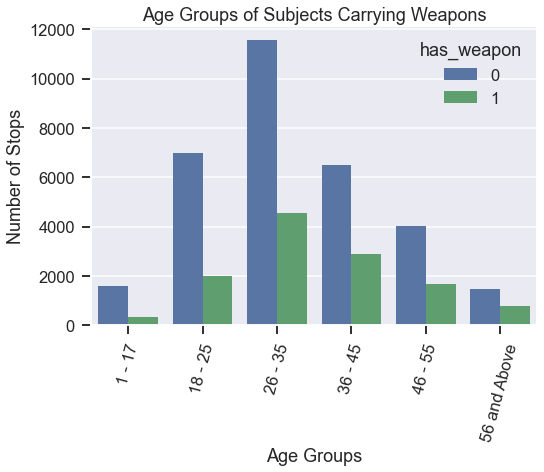

In [55]:
fig = plt.gcf()
sns.set_context(context='talk')
sns.countplot(x='subject_age', hue= 'has_weapon', data=terry_df)
sns.color_palette("hls", 8)
plt.xlabel('Age Groups')
plt.ylabel('Number of Stops')
plt.title("Age Groups of Subjects Carrying Weapons")
plt.xticks(rotation=75)
plt.show()

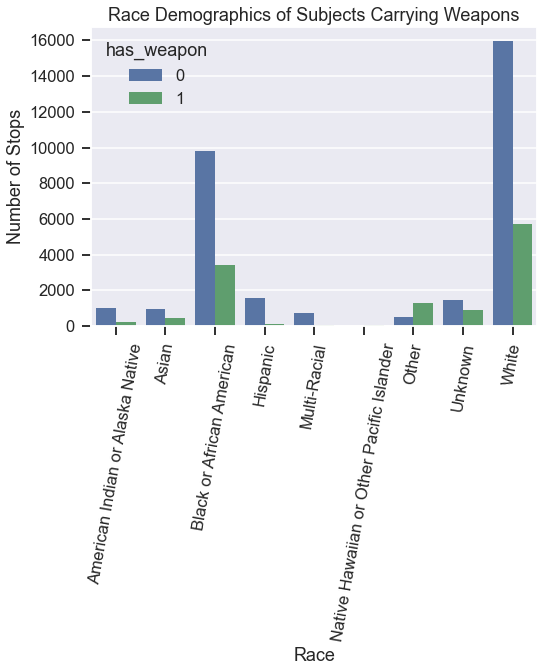

In [56]:
fig = plt.gcf()
sns.countplot(x='subject_race', hue='has_weapon', data=terry_df)
sns.set_context(context='talk')
plt.title('Race Demographics of Subjects Carrying Weapons')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.xticks(rotation=80)
plt.show()

# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [57]:
terry_df = pd.read_csv('data/terry_clean.csv')

In [58]:
terry_df.head()

,date,subject_id,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_id,officer_yob,officer_race,officer_gender,officer_squad,initial_call_type,call_type,arrest,frisk,precinct,sector,beat,officer_age
0,2015-10-16,-1,26 - 35,Asian,Male,Arrest,None,7500,1984,Black or African American,M,SOUTH PCT 1ST W - ROBERT,NaN,NaN,0,0.0,South,O,O2,31
1,2015-03-19,-1,26 - 35,Other,Male,Field Contact,None,5670,1965,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,50
2,2015-04-01,-1,26 - 35,Other,Male,Field Contact,None,7539,1963,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,52
3,2015-04-03,-1,26 - 35,Black or African American,Male,Field Contact,None,6973,1977,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,38
4,2015-04-05,-1,26 - 35,Black or African American,Male,Field Contact,None,7402,1973,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,42


In [59]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               44331 non-null  object 
 1   subject_id         44331 non-null  int64  
 2   subject_age        44331 non-null  object 
 3   subject_race       44331 non-null  object 
 4   subject_gender     44331 non-null  object 
 5   stop_resolution    44331 non-null  object 
 6   weapon_type        34687 non-null  object 
 7   officer_id         44331 non-null  int64  
 8   officer_yob        44331 non-null  int64  
 9   officer_race       44331 non-null  object 
 10  officer_gender     44331 non-null  object 
 11  officer_squad      43796 non-null  object 
 12  initial_call_type  31518 non-null  object 
 13  call_type          31518 non-null  object 
 14  arrest             44331 non-null  int64  
 15  frisk              44331 non-null  float64
 16  precinct           347

In [60]:
# changing columns into categories and datetime
terry_df = terry_df.astype({'subject_age': 'category', 'officer_gender':'category', 
                'officer_race': 'category', 'subject_race':'category', 
                'subject_gender':'category', 'date':'datetime64','arrest':'int64', 
                'frisk':'int64','precinct':'category', 'sector':'category',
                'beat': 'category', 'stop_resolution' : 'category', 'weapon_type' : 'category'})

In [61]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               44331 non-null  datetime64[ns]
 1   subject_id         44331 non-null  int64         
 2   subject_age        44331 non-null  category      
 3   subject_race       44331 non-null  category      
 4   subject_gender     44331 non-null  category      
 5   stop_resolution    44331 non-null  category      
 6   weapon_type        34687 non-null  category      
 7   officer_id         44331 non-null  int64         
 8   officer_yob        44331 non-null  int64         
 9   officer_race       44331 non-null  category      
 10  officer_gender     44331 non-null  category      
 11  officer_squad      43796 non-null  object        
 12  initial_call_type  31518 non-null  object        
 13  call_type          31518 non-null  object        
 14  arrest

In [62]:
terry_df.isna().sum()

date                     0
subject_id               0
subject_age              0
subject_race             0
subject_gender           0
stop_resolution          0
weapon_type           9644
officer_id               0
officer_yob              0
officer_race             0
officer_gender           0
officer_squad          535
initial_call_type    12813
call_type            12813
arrest                   0
frisk                    0
precinct              9590
sector                9784
beat                  9731
officer_age              0
dtype: int64

In [63]:
terry_df.describe()

,subject_id,officer_id,officer_yob,arrest,frisk,officer_age
count,4.433100e+04,44331.000000,44331.000000,44331.000000,44331.000000,44331.000000
mean,2.069479e+09,7775.958607,1982.817938,0.059552,0.225012,34.633687
std,3.947564e+09,810.136280,8.780869,0.236658,0.417595,8.452223
min,-1.000000e+00,2768.000000,1946.000000,0.000000,0.000000,21.000000
25%,-1.000000e+00,7522.000000,1978.000000,0.000000,0.000000,28.000000
50%,-1.000000e+00,7765.000000,1985.000000,0.000000,0.000000,33.000000
75%,-1.000000e+00,8442.000000,1989.000000,0.000000,0.000000,39.000000
max,1.755682e+10,8804.000000,1997.000000,1.000000,1.000000,70.000000


In [64]:
terry_df.call_type.value_counts()

911                              19711
ONVIEW                            8412
TELEPHONE OTHER, NOT 911          3098
ALARM CALL (NOT POLICE ALARM)      290
TEXT MESSAGE                         6
SCHEDULED EVENT (RECURRING)          1
Name: call_type, dtype: int64

***
## Preprocessing the Data

In [65]:
# dropping unnecessary columns
df = terry_df.drop(['date', 'subject_id', 'officer_id', 'initial_call_type', 'call_type', 'precinct', 'sector', 'beat', 'officer_squad' ], axis=1, inplace=False)

In [66]:
df.head()

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age
0,26 - 35,Asian,Male,Arrest,None,1984,Black or African American,M,0,0,31
1,26 - 35,Other,Male,Field Contact,None,1965,White,M,0,0,50
2,26 - 35,Other,Male,Field Contact,None,1963,White,M,0,0,52
3,26 - 35,Black or African American,Male,Field Contact,None,1977,White,M,0,0,38
4,26 - 35,Black or African American,Male,Field Contact,None,1973,White,M,0,0,42


In [67]:
df.mode()

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age
0,26 - 35,White,Male,Field Contact,None,1986,White,M,0,0,31


In [68]:
# fill in weapon_type with mode 
df['weapon_type'] = df['weapon_type'].fillna('None')
df.isna().sum()

subject_age        0
subject_race       0
subject_gender     0
stop_resolution    0
weapon_type        0
officer_yob        0
officer_race       0
officer_gender     0
arrest             0
frisk              0
officer_age        0
dtype: int64

#### Some feature engineering

In [69]:
weapons = [] 
for weapon in df['weapon_type']:
    if weapon == 'None': 
        weapons.append(0)
    else:
        weapons.append(1) 
df['has_weapon'] = weapons 
df.head() 

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age,has_weapon
0,26 - 35,Asian,Male,Arrest,None,1984,Black or African American,M,0,0,31,0
1,26 - 35,Other,Male,Field Contact,None,1965,White,M,0,0,50,0
2,26 - 35,Other,Male,Field Contact,None,1963,White,M,0,0,52,0
3,26 - 35,Black or African American,Male,Field Contact,None,1977,White,M,0,0,38,0
4,26 - 35,Black or African American,Male,Field Contact,None,1973,White,M,0,0,42,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   subject_age      44331 non-null  category
 1   subject_race     44331 non-null  category
 2   subject_gender   44331 non-null  category
 3   stop_resolution  44331 non-null  category
 4   weapon_type      44331 non-null  category
 5   officer_yob      44331 non-null  int64   
 6   officer_race     44331 non-null  category
 7   officer_gender   44331 non-null  category
 8   arrest           44331 non-null  int64   
 9   frisk            44331 non-null  int64   
 10  officer_age      44331 non-null  int64   
 11  has_weapon       44331 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 2.0 MB


In [71]:
df.isna().sum()

subject_age        0
subject_race       0
subject_gender     0
stop_resolution    0
weapon_type        0
officer_yob        0
officer_race       0
officer_gender     0
arrest             0
frisk              0
officer_age        0
has_weapon         0
dtype: int64

***
## Define X and y

In [72]:
X = df.drop(['arrest'], axis=1)
y = df['arrest']

***
## Train-test Split

In [73]:
# splitting data into training-testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
# creating df with continuous features
cont_feat = X.select_dtypes(exclude = ['object', 'category'])

# removing object and categoricals features in X_train and X_test
X_train_cont = X_train.select_dtypes(exclude = ['object', 'category'])
X_test_cont = X_test.select_dtypes(exclude = ['object', 'category'])

In [75]:
# normalizing the data 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_cont)
scaled_X_test = scaler.transform(X_test_cont)

# converting train data into 
#scaled_df_train = pd.DataFrame(scaled_train, columns=X.columns)

#scaled_df_train.head()

In [76]:
# making df with object and categorical feat.
X_train_cat = X_train.select_dtypes(include = ['object', 'category'])
X_test_cat = X_test.select_dtypes(include = ['object', 'category'])

In [77]:
# OneHotEncode categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [78]:
# fit train and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

In [79]:
# make columns into a df
columns = ohe.get_feature_names(input_features=X_train_cat.columns) 
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns) 
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

In [80]:
columns = cont_feat.columns

In [81]:
# making X_train into a df
X_train_df = pd.DataFrame(scaled_X_train, columns=columns)
X_train_df.head()

,officer_yob,frisk,officer_age,has_weapon
0,0.934555,-0.538593,-0.669853,-0.247972
1,-1.455938,-0.538593,1.459896,-0.247972
2,-1.455938,-0.538593,1.341577,-0.247972
3,-0.089942,-0.538593,-0.196575,-0.247972
4,-1.569771,-0.538593,1.814854,-0.247972


In [82]:
# combining normalized train data and categorical data
X_train = pd.concat([pd.DataFrame(scaled_X_train, columns=columns), cat_train_df], axis=1)
X_test = pd.concat([pd.DataFrame(scaled_X_test, columns=columns), cat_test_df], axis=1)

In [83]:
X_test.head()

,officer_yob,frisk,officer_age,has_weapon,subject_age_1 - 17,subject_age_18 - 25,subject_age_26 - 35,subject_age_36 - 45,subject_age_46 - 55,subject_age_56 and Above,...,officer_race_American Indian/Alaska Native,officer_race_Asian,officer_race_Black or African American,officer_race_Hispanic or Latino,officer_race_Nat Hawaiian/Oth Pac Islander,officer_race_Not Specified,officer_race_Two or More Races,officer_race_White,officer_gender_F,officer_gender_M
0,1.162221,-0.538593,-1.024811,-0.247972,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.114439,-0.538593,1.459896,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.706889,1.856690,-0.669853,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.593056,1.856690,-0.906491,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.431441,-0.538593,0.631661,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [84]:
# Using SMOTE to address class imbalance

# check for class imbalance
print(y_train.value_counts()) 

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    31250
1     1998
Name: arrest, dtype: int64


1    31250
0    31250
Name: arrest, dtype: int64


*** 
## Modeling Using Ensemble Methods
I will use four different ensemble methods for modeling which include KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), and GradientBoostingClassifier(). I will use a pipeline to simplify the process

#### Creating A Pipeline

In [85]:
# list of classifiers
clfs = [KNeighborsClassifier(), 
               RandomForestClassifier(), AdaBoostClassifier(), 
              GradientBoostingClassifier()]

In [86]:
# created a function to determine metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [87]:
# create a four loop to run pipeline thru classifiers list
for clf in clfs:
    pipe = Pipeline(steps=[('clf', clf)])
    pipe.fit(X_train_resampled, y_train_resampled)
    print(clf)
    print('Model Score: %.3f' %pipe.score(X_test, y_test))

KNeighborsClassifier()
Model Score: 0.930
RandomForestClassifier()
Model Score: 0.970
AdaBoostClassifier()
Model Score: 0.903
GradientBoostingClassifier()
Model Score: 0.942


Model scores look good! However they can be imporved using GridSearchCV by determining the best combination of parameters for a given model. Grid Search works by training a model on the data for each unique combination of parameters and then returning the parameters of the model that performed best.

#### GridSearchCV

In [88]:
# first make a dictionary with parameters to tune
param_grid = {"clf__n_estimators": [5, 10],
              "clf__min_samples_leaf": [0.10, 1]}

In [89]:
# instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                          scoring='accuracy', verbose=1, n_jobs=-1, cv=5, return_train_score=False)

In [90]:
# fit to the data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'clf__min_samples_leaf': [0.1, 1],
                         'clf__n_estimators': [5, 10]},
             scoring='accuracy', verbose=1)

In [91]:
# find best parameters for the model
grid_search.best_params_

{'clf__min_samples_leaf': 1, 'clf__n_estimators': 10}

In [92]:
# find best estimator 
grid_search.best_estimator_

Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators=10))])

In [93]:
grid_search.best_score_

0.91496

#### Create a custom classfier using BaseEstimator
I will use sklearn's BaseEstimator with ClfSwitcher to pass any classifier and parameters for each classifer

In [94]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = None ):

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_prob(self, X):
        return self.estimator.predict_prob(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [95]:
# create another pipeline with ClfSwitcher
clf_pipe = Pipeline([('clf', ClfSwitcher())])

In [96]:
# make dictionary with parameters
params = [
{
    'clf__estimator': [KNeighborsClassifier()],
    'clf__estimator__n_neighbors': [3, 5],
    'clf__estimator__weights': ['uniform', 'distance']
},
{   'clf__estimator': [RandomForestClassifier()],
    'clf__estimator__criterion': ['gini', 'entropy'],
    'clf__estimator__min_samples_split': [2, 5], 
    'clf__estimator__max_depth': [3, 5]
},  
{   'clf__estimator': [AdaBoostClassifier()],
    'clf__estimator__n_estimators': [2, 4]
},
{   'clf__estimator': [GradientBoostingClassifier()],
    'clf__estimator__min_samples_leaf': [1, 3] 
}
]

In [97]:
# create another GridSearchCV instance
grid_search_2 = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, verbose=1, cv=3)

In [98]:
# fit the models
grid_search_2.fit(X_train_resampled, y_train_resampled) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.9min finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             n_jobs=-1,
             param_grid=[{'clf__estimator': [KNeighborsClassifier()],
                          'clf__estimator__n_neighbors': [3, 5],
                          'clf__estimator__weights': ['uniform', 'distance']},
                         {'clf__estimator': [RandomForestClassifier()],
                          'clf__estimator__criterion': ['gini', 'entropy'],
                          'clf__estimator__max_depth': [3, 5],
                          'clf__estimator__min_samples_split': [2, 5]},
                         {'clf__estimator': [AdaBoostClassifier()],
                          'clf__estimator__n_estimators': [2, 4]},
                         {'clf__estimator': [GradientBoostingClassifier()],
                          'clf__estimator__min_samples_leaf': [1, 3]}],
             verbose=1)

In [99]:
# find best estimator
best_pipe = grid_search_2.best_estimator_

In [100]:
# find best model using best estimator
best_pipe['clf']

ClfSwitcher(estimator=GradientBoostingClassifier())

***
## Looking at model scores

In [101]:
# .score() returns acuracy score which is calculated by comparing X_train_resampled, y_train_resampled
best_pipe.score(X_train_resampled, y_train_resampled)

0.969632

In [102]:
# .score() returns acuracy score which is calculated by comparing X_test, y_test
best_pipe.score(X_test, y_test)

0.942434358928088

***
## Working with GradientBoostingClassifier( )
Above, I determined the best classifer in termns of performance to be GradientBoostingClassifier(). I found this by creating a gridsearch and using the .best_estimator_ method. I will now use this GradientBoostingClassifier() to model the data

In [103]:
# instantiate classifier
model = GradientBoostingClassifier()

In [104]:
# fit the model to data
model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [105]:
# find probability scores for data points in X_train_resampled 
y_score = model.decision_function(X_train_resampled)

In [106]:
# make predictions
y_preds = model.predict(X_test)

I want to create confusion matrices, ROC curves, and AUC to determine to do that I must determine fpr (false positive rate), tpr (true positive rate), and thresholds for both testing and training data.


#### Train data

In [107]:
# calculating fpr, tpr, and thresholds for ROC curve training data and training preds

# The Receiver Operator Characteristic curve (ROC curve) illustrates the true positive rate against 
# the false positive rate of our classifier. 

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_score)

In [108]:
# calculate ROC AUC
print('Train AUC: {}'.format(auc(fpr, tpr)))

Train AUC: 0.998187301888


#### Test data

In [109]:
# calculating fpr, tpr, and thresholds for ROC curve of testing data and testing preds
f_p_r, t_p_r, thresh = roc_curve(y_test, y_preds)

In [110]:
# find mean root square error 
print('Test Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_preds)))

Test Root Mean Square Error 0.23992840822193592


In [111]:
# calculate ROC AUC
print('Test AUC: {}'.format(auc(f_p_r, t_p_r)))

Test AUC: 0.967985514809368


#### Making ROC Curves for Testing Data

AUC: 0.967985514809368


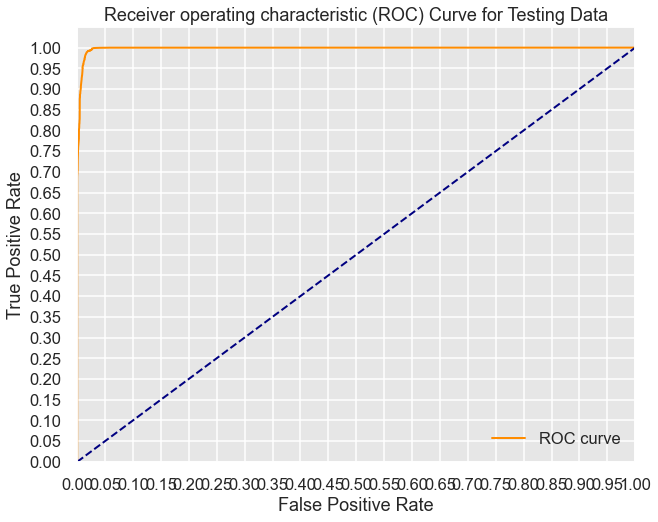

In [112]:
# The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate.
# The AUC, or area under the curve, gives us a singular metric to compare these.
# An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(f_p_r, t_p_r)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

#### Confusion Matrix
The confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives, and False Negatives. Confusion matrices are a very handy tool to help us quickly understand how well a classification model is performing. 

In [113]:
# Create a confusion matrix for testing dataset
cf = confusion_matrix(y_test, y_preds)
cf

array([[9805,  636],
       [   2,  640]])

In [114]:
# Create a classification report to display evaluation metrics
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10441
           1       0.50      1.00      0.67       642

    accuracy                           0.94     11083
   macro avg       0.75      0.97      0.82     11083
weighted avg       0.97      0.94      0.95     11083



In [115]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_preds)

{'TP': 640, 'TN': 9805, 'FP': 636, 'FN': 2}

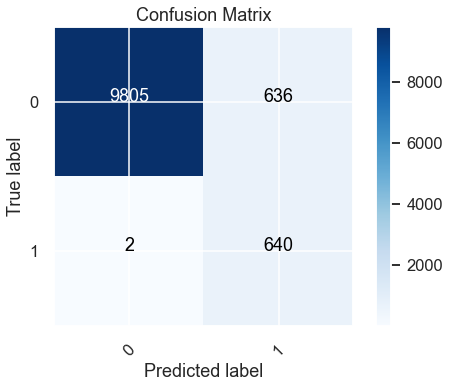

In [116]:
# Plot confusion matrix
plt.imshow(cf,  cmap=plt.cm.Blues) 

# Add titles 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# scale axis'
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cf.max() / 2. 

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment='center',
                 color='white' if cf[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

I have a lot False Negatives.. 

#### Plotting Model Performance

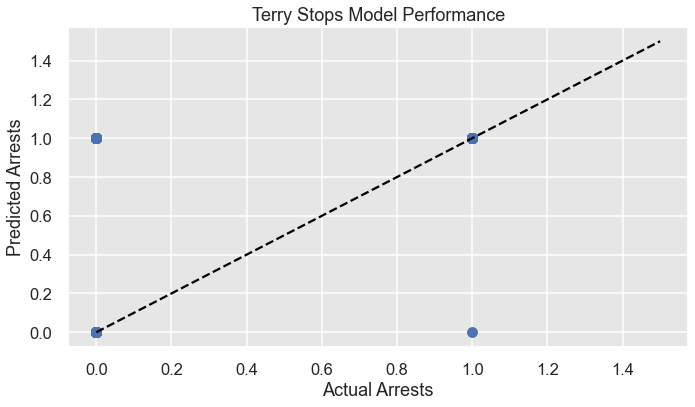

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds)
plt.plot([0, 1.5], [0, 1.5], '--k') # Plot line of best fit
plt.axis('tight') 
plt.title('Terry Stops Model Performance')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

***
## Creating a Model Using Best Features

In [118]:
# find most important features
model.feature_importances_

array([ 4.69731550e-02,  1.01116351e-04,  1.03386372e-01,  0.00000000e+00,
        2.58994866e-04,  6.93255567e-04,  1.75892954e-05,  1.18034448e-04,
        0.00000000e+00,  0.00000000e+00,  5.52048754e-04,  1.11908682e-13,
        2.29864881e-09,  1.06820989e-02,  2.07703212e-03,  0.00000000e+00,
        3.90079744e-05,  1.86241079e-04, -3.63185598e-16,  2.08448991e-07,
        2.50217076e-04,  4.00477186e-04,  8.05886916e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.02397443e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.53369691e-04,
        7.31917970e-05,  3.31536733e-03,  2.01308100e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00005279e-04,  8.31144083e-05,
        1.22104241e-04,  0.00000000e+00,  0.00000000e+00,  3.90725377e-03,
        0.00000000e+00,  

In [119]:
# make a function to plot feature importances
def plot_feat_importances(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    plt.bar(features, feature_importances)
    plt.xlabel("Features")
    plt.ylabel("Feature Importance Scores")
    plt.title("Feature Importances")
    plt.xticks(rotation=90)
    plt.show()

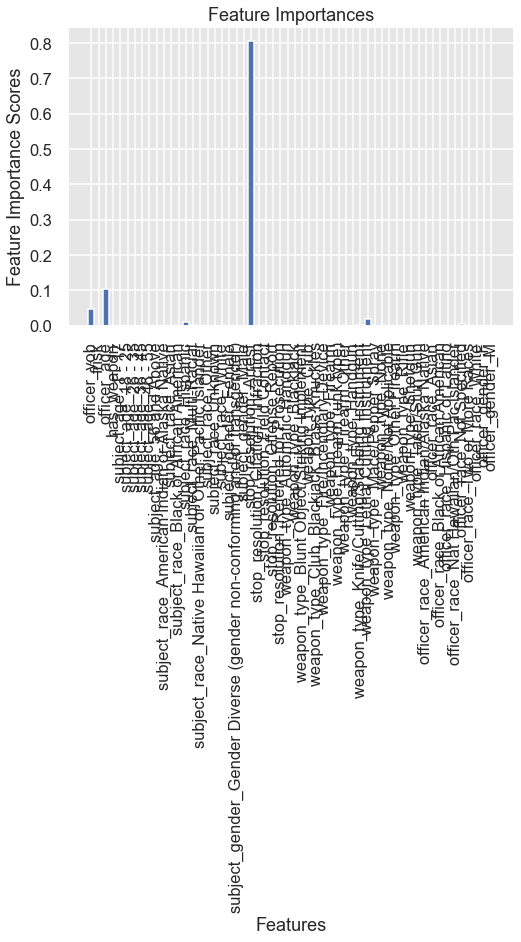

In [120]:
plot_feat_importances(model=model, X_train=X_train)

In [121]:
# Create a list of the best features
feats = ['frisk', 'officer_yob', 'stop_resolution_Arrest']
X_feat_train = X_train[feats]
X_feat_test = X_test[feats]

In [122]:
# check class imbalance
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE()
X_feat_resampled, y_feat_resampled = smote.fit_sample(X_feat_train, y_train)

print('\n')
print(pd.Series(y_feat_resampled).value_counts())

0    31250
1     1998
Name: arrest, dtype: int64


1    31250
0    31250
Name: arrest, dtype: int64


In [123]:
# Fit model
model.fit(X_feat_resampled, y_feat_resampled)

GradientBoostingClassifier()

In [124]:
# Make predictions
y_pred_feat = model.predict(X_feat_test)

***
## Best Model Performance with Best Features

In [125]:
model.score(X_feat_test, y_test)

0.820265271135974

In [126]:
# calculating fpr, tpr, and thresholds for ROC curve of testing data and testing preds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_feat)

# find mean root square error 
print('Test Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_pred_feat)))

# calculate ROC AUC
print('Test AUC: {}'.format(auc(fpr, tpr)))

Test Root Mean Square Error 0.4239513284140362
Test AUC: 0.9009521980951563


#### Create ROC Curve

AUC: 0.9009521980951563


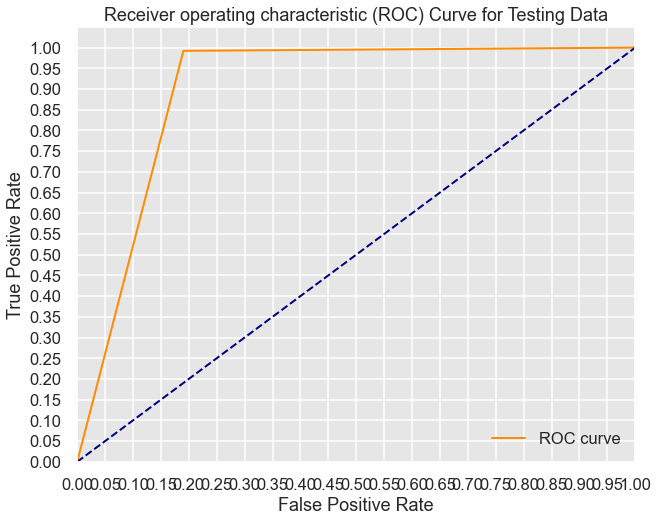

In [127]:
# The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate.
# The AUC, or area under the curve, gives us a singular metric to compare these.
# An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

#### Create confusion matrix

In [128]:
# Create a confusion matrix for testing dataset
cf = confusion_matrix(y_test, y_pred_feat)
cf

array([[8454, 1987],
       [   5,  637]])

In [129]:
# Create a classification report to display evaluation metrics
print(classification_report(y_test, y_pred_feat))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     10441
           1       0.24      0.99      0.39       642

    accuracy                           0.82     11083
   macro avg       0.62      0.90      0.64     11083
weighted avg       0.96      0.82      0.87     11083



Precision went down :/

#### Plot Model Performance

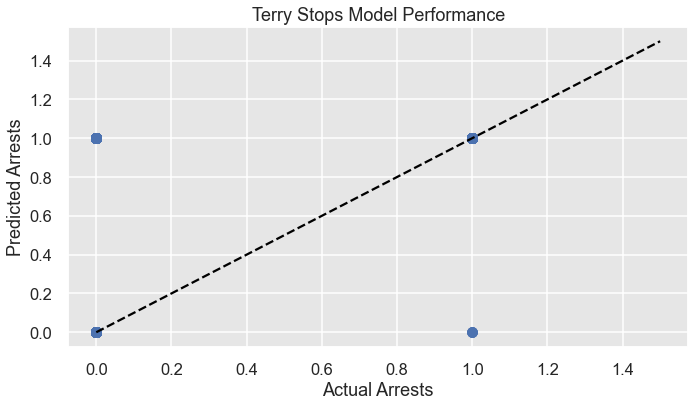

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_feat)
plt.plot([0, 1.5], [0, 1.5], '--k') # Plot line of best fit
plt.axis('tight') 
plt.title('Terry Stops Model Performance')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

## Model Performance of Imbalanced Data
The data has not been balanced with SMOTE( )

In [131]:
# create classifier instance
nonsmote_model = GradientBoostingClassifier()

In [132]:
# fit the model
nonsmote_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [133]:
# make predictions
nonsmote_ypred = nonsmote_model.predict(X_test)

In [134]:
# calculate accuracy score for training data
nonsmote_model.score(X_train, y_train)

0.9732916265640038

In [135]:
# calculate accuracy score for training data
nonsmote_model.score(X_test,y_test)

0.9719390056843815

#### Create confusion matrix

In [136]:
cf = confusion_matrix(y_test, nonsmote_ypred)
cf

array([[10379,    62],
       [  249,   393]])

In [137]:
# create a classification report
print(classification_report(y_test, nonsmote_ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10441
           1       0.86      0.61      0.72       642

    accuracy                           0.97     11083
   macro avg       0.92      0.80      0.85     11083
weighted avg       0.97      0.97      0.97     11083



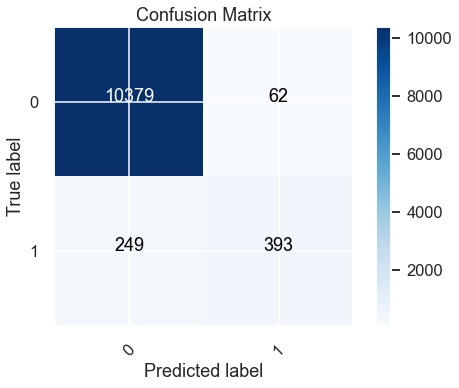

In [138]:
# plot confusion matrix

plt.imshow(cf,  cmap=plt.cm.Blues) 

# add titles 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# scale axis'
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cf.max() / 2. 

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment='center',
                 color='white' if cf[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

#### Plotting Model Performance

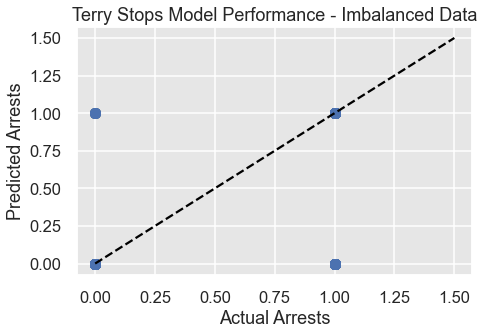

In [139]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, nonsmote_ypred)
plt.plot([0, 1.5], [0, 1.5], '--k')
plt.axis('tight')
plt.title('Terry Stops Model Performance - Imbalanced Data')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

#### Plot ROC Curve for testing and training data

Testing AUC: 0.967985514809368


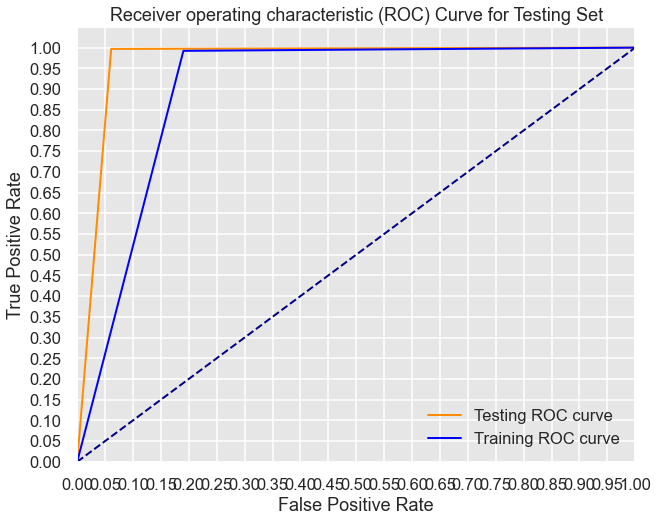

In [140]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(f_p_r, t_p_r, color='darkorange',
         lw=lw, label='Testing ROC curve')
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='Training ROC curve')
fpr, tpr, thresh = roc_curve(y_train_resampled, y_score)
rocauc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Set')
plt.legend(loc='lower right')
print('Testing AUC: {}'.format(auc(f_p_r, t_p_r)))
plt.show()